### Table of Content
* MFI [Money Flow Index](#MFI)
* RSI [Relative Strength Index](#RSI)
* OBV [On-Balance Volume](#OBV)
* BBS [Bollinger Band Strategy](#BBS)

<h1> MFI, Money Flow Index</h1>
<a class="anchor" id="MFI">MFI</a> is a technical indicator that generates overbought or oversold signals using both prices and volume data.
0. Get instrument historical data <br>
1. Calculate the Typical Price for each of the last periods (normally 14 days). <br>
2. For each period, mark whether the typical price was higher or lower than the prior period. This will tell you whether Raw Money Flow is positive or negative <br>


In [1]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
stock = 'ANSS'
df = web.DataReader(stock, data_source='yahoo', start='01-01-2020')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,259.660004,256.250000,257.010010,259.589996,657900,259.589996
2020-01-03,258.109985,253.750000,254.960007,256.970001,468400,256.970001
2020-01-06,255.869995,252.619995,255.460007,254.589996,612600,254.589996
2020-01-07,258.339996,253.500000,255.110001,256.670013,357100,256.670013
2020-01-08,258.890015,255.910004,256.410004,257.730011,445900,257.730011
...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988


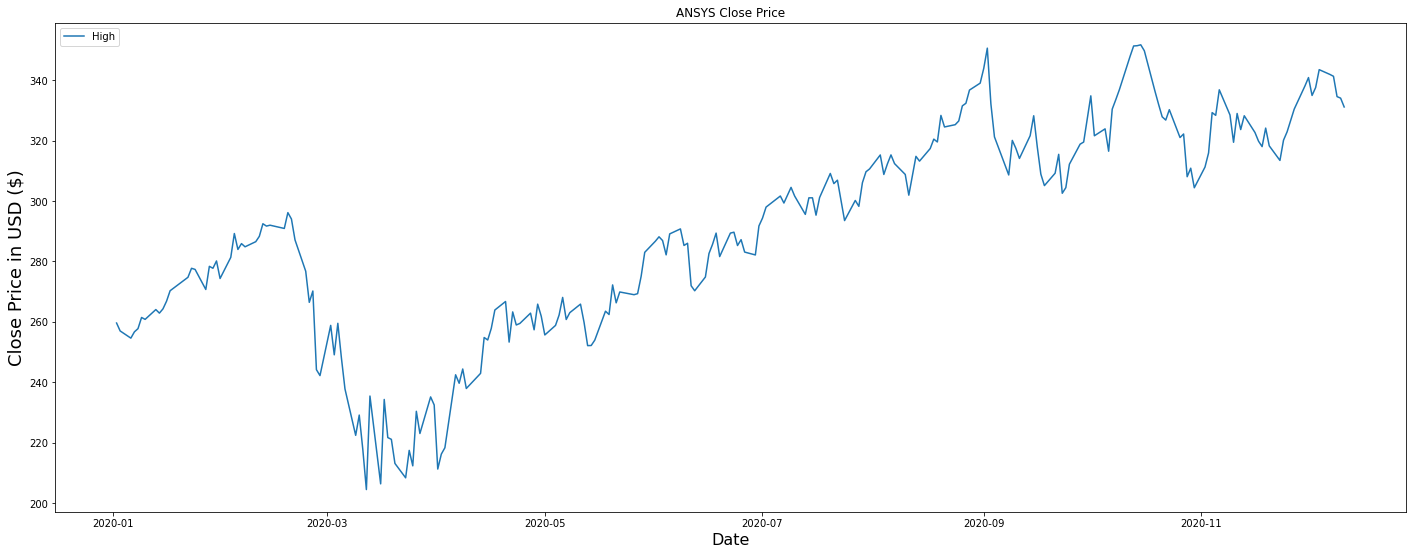

In [2]:
plt.figure(figsize=(24.2,9))
plt.plot(df['Close'], label = 'Closing Price')
plt.title('ANSYS Close Price')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price in USD ($)', fontsize = 18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

$ typical \; price = \frac{High + Low + Close}{3} $

In [3]:
# calculate typical price
typical_price = (df['High'] + df['Low'] + df['Close'])/3
typical_price

Date
2020-01-02    258.500000
2020-01-03    256.276662
2020-01-06    254.359996
2020-01-07    256.170003
2020-01-08    257.510010
                 ...    
2020-12-07    343.016673
2020-12-08    341.346659
2020-12-09    337.099996
2020-12-10    333.836670
2020-12-11    332.126658
Length: 240, dtype: float64

$ Raw \; Money \; Flow = typical \; price * volume $

In [4]:
period = 14
money_flow = typical_price * df['Volume']
money_flow

Date
2020-01-02    1.700672e+08
2020-01-03    1.200400e+08
2020-01-06    1.558209e+08
2020-01-07    9.147831e+07
2020-01-08    1.148237e+08
                  ...     
2020-12-07    1.200901e+08
2020-12-08    1.374603e+08
2020-12-09    1.111082e+08
2020-12-10    1.067610e+08
2020-12-11    1.473015e+07
Length: 240, dtype: float64

In [5]:
# get Positive and Negative money flows
p_flow = []; n_flow=[]

for i in range(1, len(typical_price)):
    if   typical_price[i] > typical_price[i-1]:
        p_flow.append(money_flow[i-1])
        n_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        n_flow.append(money_flow[i-1])
        p_flow.append(0)
    else:
        n_flow.append(0)
        p_flow.append(0)



In [6]:
# accumulate positive and negative flows within the time period, current 14 days
p_mf=[];n_mf=[]

for i in range(period-1, len(p_flow)):
    p_mf.append( sum(p_flow[i+1-period : i+1]))
    n_mf.append( sum(n_flow[i+1-period : i+1]))

$Money \; Flow \; Index = \frac{100 * Positive \; Money \; Flow}{Positive \; Money \; Flow + Negative \; Money \; Flow} $

In [7]:
#calculate MFI
mfi = 100 * (np.array(p_mf) / (np.array(p_mf) + np.array(n_mf)))
mfi

array([78.34814503, 87.20592391, 86.8435164 , 86.54678586, 86.65410839,
       86.50663838, 81.36531083, 82.01717218, 88.76832091, 81.69097833,
       72.60510963, 65.50329562, 65.05327721, 64.24860949, 63.83033699,
       63.71262443, 62.05801951, 51.53593656, 53.80440865, 47.86591657,
       46.3340123 , 39.68576141, 30.5464197 , 29.87924542, 30.05571641,
       27.01861755, 34.11929714, 27.48211849, 29.2788529 , 24.77504191,
       24.54999927, 24.70937059, 25.46290524, 24.914525  , 24.87599567,
       31.9304238 , 31.44583892, 38.00106362, 36.97829841, 45.11938698,
       35.92833841, 36.64665088, 36.34891586, 35.3052728 , 41.59068485,
       47.50064651, 46.43341518, 52.24421454, 51.26274288, 43.89027774,
       51.21959932, 48.88385708, 56.75848294, 55.57860401, 57.67245292,
       67.58351034, 66.21452952, 76.74790795, 75.73045051, 75.48888465,
       76.0655964 , 70.37462972, 79.93865314, 82.55156218, 77.75369186,
       77.73180865, 71.60241703, 70.93751914, 77.36583651, 66.21

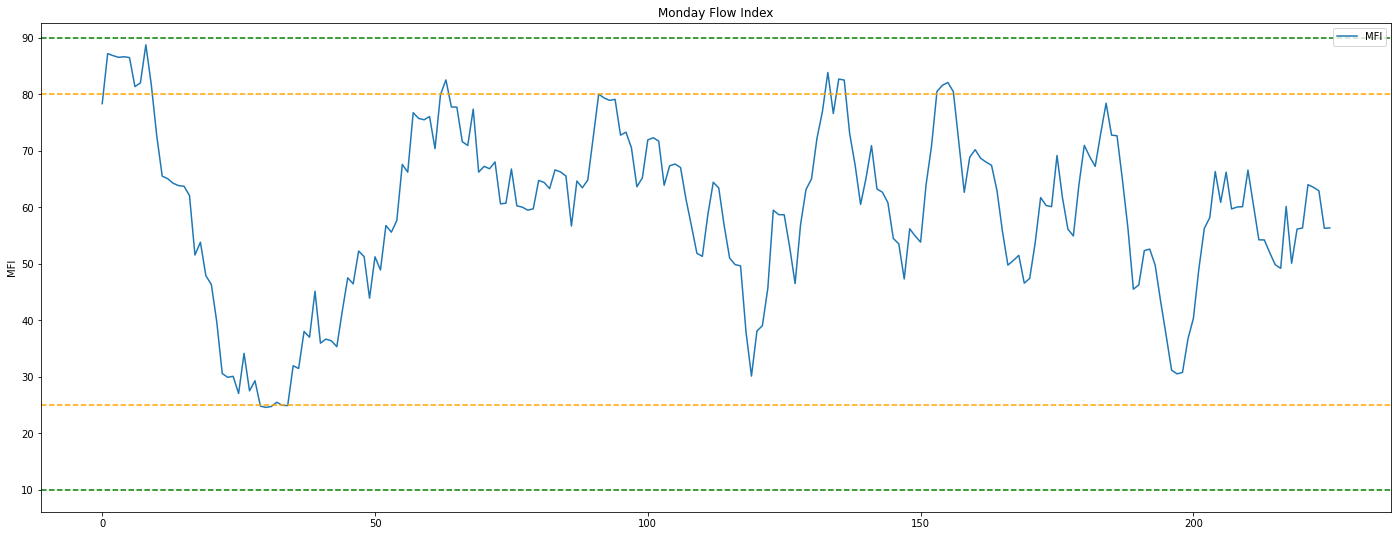

In [8]:
# matplotlib MFI
mfi_df = pd.DataFrame()
mfi_df['MFI'] = mfi
plt.figure(figsize=(24.2,9))
plt.plot(mfi_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [9]:
# add mfi results to the 1st data frame
full_df  = pd.DataFrame()
full_df = df[period:]
full_df['MFI'] = mfi
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2020-01-23,278.709991,273.579987,274.369995,277.709991,493900,277.709991,78.348145
2020-01-24,280.220001,275.339996,278.309998,277.339996,460000,277.339996,87.205924
2020-01-27,273.459991,268.160004,270.480011,270.700012,425100,270.700012,86.843516
2020-01-28,279.160004,271.000000,273.350006,278.359985,383800,278.359985,86.546786
2020-01-29,280.970001,276.029999,279.670013,277.720001,341200,277.720001,86.654108
...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547


In [10]:
# a simple function to find overbought and oversold points
def get_mfi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['MFI'])):
        if FullDataFrame['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['MFI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)


In [11]:
# add over overbought point and oversold points to dataframe
full_df['MFI_Buy']= get_mfi_points(full_df, 80, 25)[0]
full_df['MFI_Sell']= get_mfi_points(full_df, 80, 25)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell
Date,,,,,,,,,
2020-01-23,278.709991,273.579987,274.369995,277.709991,493900,277.709991,78.348145,NaN,NaN
2020-01-24,280.220001,275.339996,278.309998,277.339996,460000,277.339996,87.205924,NaN,277.339996
2020-01-27,273.459991,268.160004,270.480011,270.700012,425100,270.700012,86.843516,NaN,270.700012
2020-01-28,279.160004,271.000000,273.350006,278.359985,383800,278.359985,86.546786,NaN,278.359985
2020-01-29,280.970001,276.029999,279.670013,277.720001,341200,277.720001,86.654108,NaN,277.720001
...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN


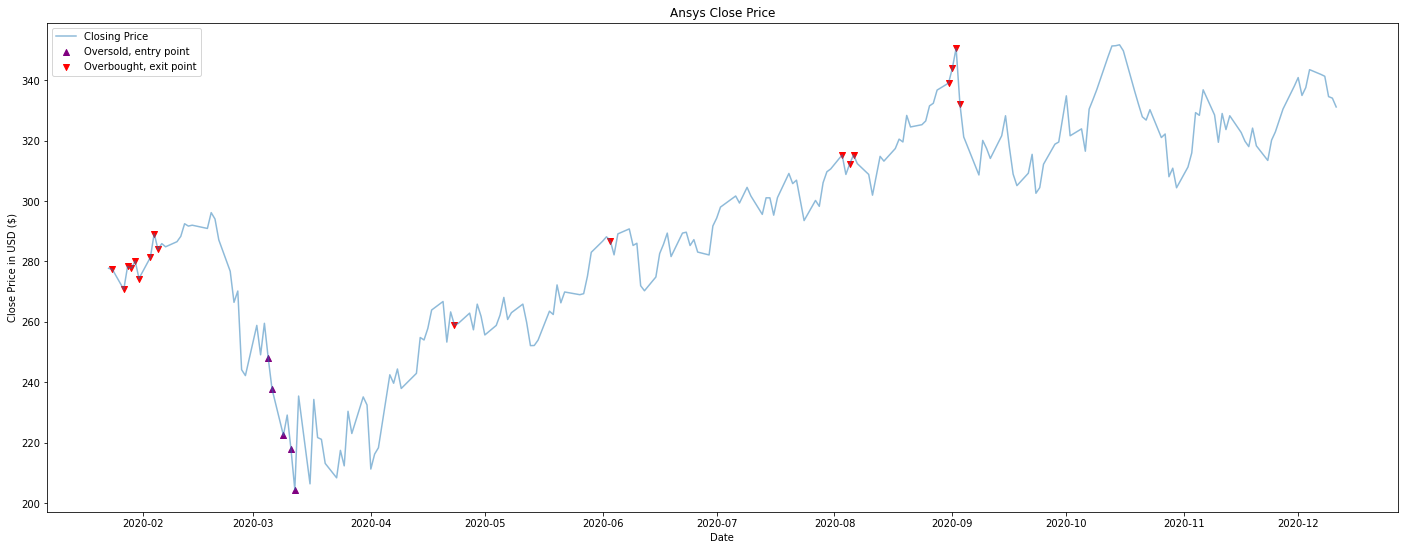

In [12]:
#draw a pretty picture to show the overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'Overbought, exit point', marker = 'v', alpha = 1)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

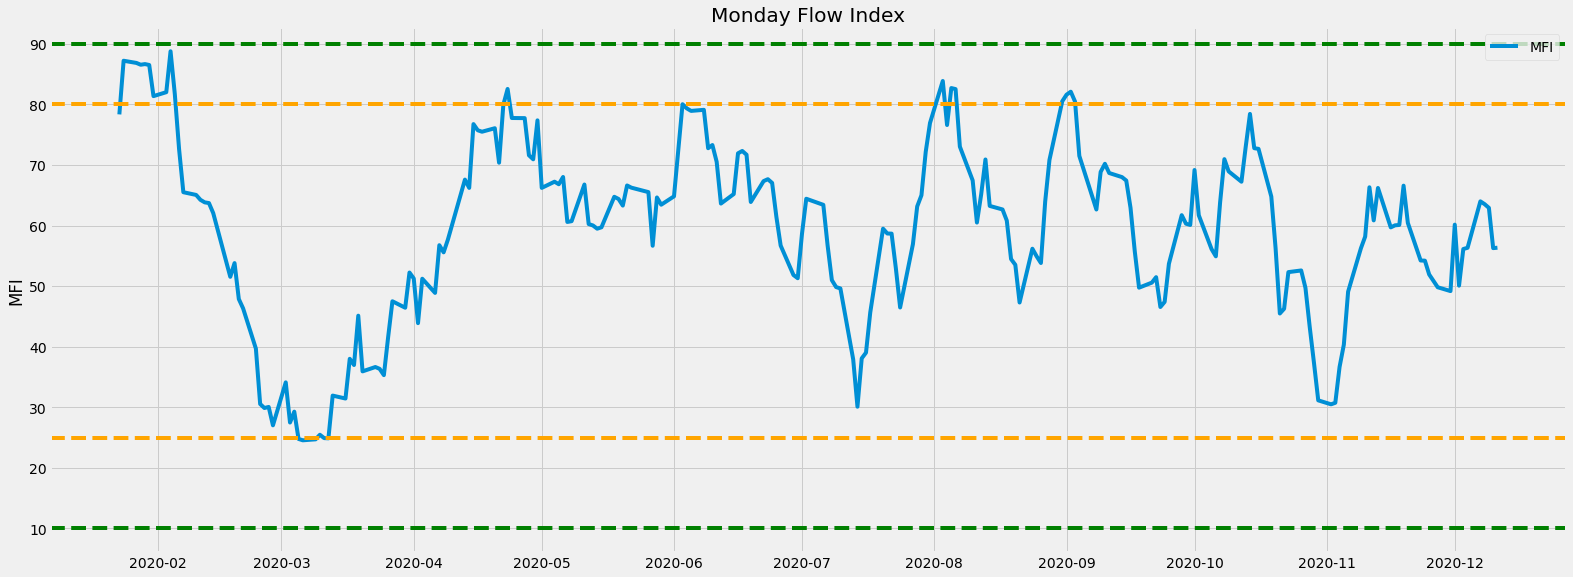

In [14]:
# Add some style to the plot so it's comparable from above plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()
# Reference from https://www.youtube.com/watch?v=tF1Lz4WBQwM

<h1 id="RSI"> RSI, Relative Strength Index</h1>
RSI is another momentum indicator that measures the magnitude of recent price chane to evaluate price of a stock's overbought or oversold status. Unlike MFI, it doesn't take volume into consideration. 

$RSI = 100 - [\frac{100}{1+RS} ] $ where $ RS = \frac{14 \; days \; average \; gain}{14 \; days \; average \; loss} $

In [15]:
# reference from https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
# Quicker way
delta = df['Close'].diff() #calculate the difference of daily closing price
delta

Date
2020-01-02         NaN
2020-01-03   -2.619995
2020-01-06   -2.380005
2020-01-07    2.080017
2020-01-08    1.059998
                ...   
2020-12-07   -1.579987
2020-12-08   -0.610016
2020-12-09   -6.730011
2020-12-10   -0.509979
2020-12-11   -2.920013
Name: Close, Length: 240, dtype: float64

$ RS = \frac{14 \; days \; average \; gain}{14 \; days \; average \; loss} $

In [16]:
dUp, dDown = delta.copy(), delta.copy()
dUp[dUp < 0] = 0
dDown[dDown > 0] = 0
RolUp = dUp.rolling(period).mean() # previous 14 days average gain
RolDown = dDown.rolling(period).mean().abs() # !! different from what's described in https://www.investopedia.com/terms/r/rsi.asp

RS = RolUp / RolDown
RS

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2020-12-07    1.840035
2020-12-08    2.042696
2020-12-09    1.648394
2020-12-10    1.380807
2020-12-11    1.556468
Name: Close, Length: 240, dtype: float64

$RSI = 100 - [\frac{100}{1+RS} ] $

In [17]:
rsi= 100.0 - (100.0 / (1.0 + RS))
rsi

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2020-12-07    64.789164
2020-12-08    67.134415
2020-12-09    62.241273
2020-12-10    57.997432
2020-12-11    60.883532
Name: Close, Length: 240, dtype: float64

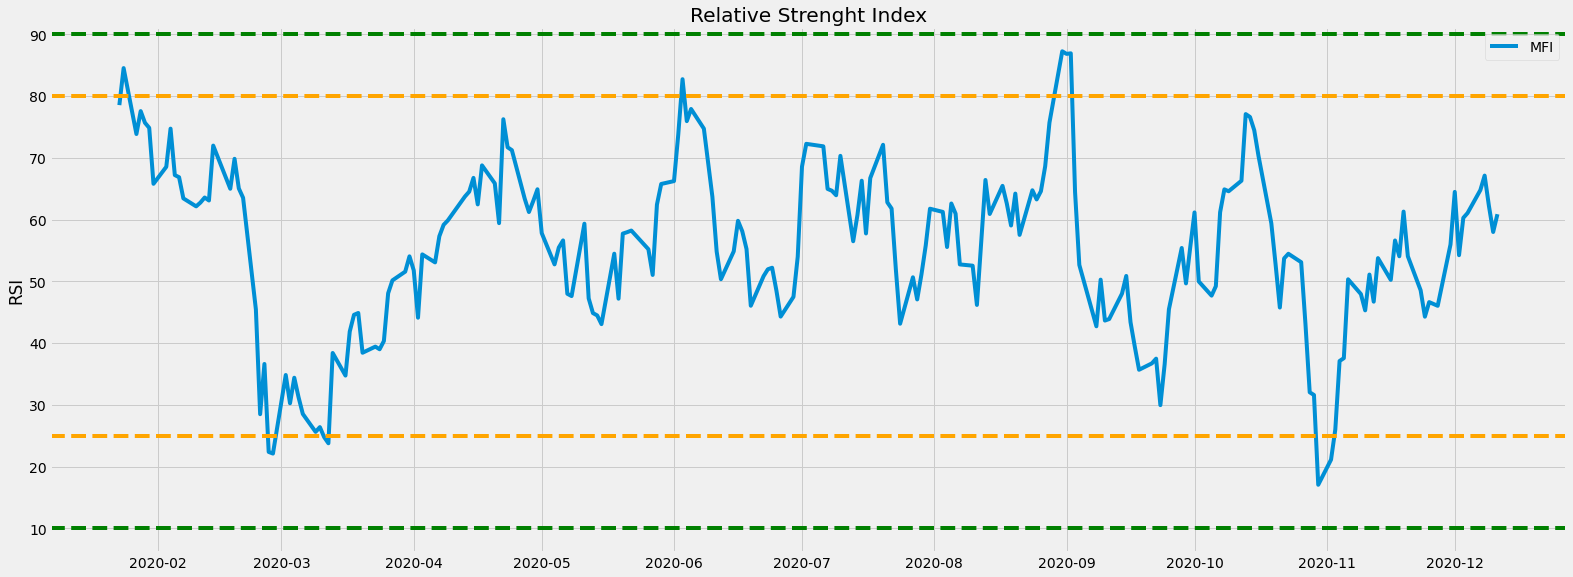

In [18]:
# matplotlib MFI
plt.figure(figsize=(24.2,9))
plt.plot(rsi, label = 'Relative Strenght Index')
plt.title('Relative Strenght Index')
# plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [19]:
# add rsi results to the mfi data frame
full_df['RSI'] = rsi[period:]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI
Date,,,,,,,,,,
2020-01-23,278.709991,273.579987,274.369995,277.709991,493900,277.709991,78.348145,NaN,NaN,78.544425
2020-01-24,280.220001,275.339996,278.309998,277.339996,460000,277.339996,87.205924,NaN,277.339996,84.537134
2020-01-27,273.459991,268.160004,270.480011,270.700012,425100,270.700012,86.843516,NaN,270.700012,73.866712
2020-01-28,279.160004,271.000000,273.350006,278.359985,383800,278.359985,86.546786,NaN,278.359985,77.574387
2020-01-29,280.970001,276.029999,279.670013,277.720001,341200,277.720001,86.654108,NaN,277.720001,75.687529
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN,64.789164
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN,67.134415
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN,62.241273


In [20]:
# a similar function to find bullish and bearing momentum points
def get_rsi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['RSI'])):
        if FullDataFrame['RSI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['RSI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [21]:
# add over overbought point and oversold points to dataframe
full_df['RSI_Buy']= get_rsi_points(full_df, 70, 30)[0]
full_df['RSI_Sell']= get_rsi_points(full_df, 70, 30)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI,RSI_Buy,RSI_Sell
Date,,,,,,,,,,,,
2020-01-23,278.709991,273.579987,274.369995,277.709991,493900,277.709991,78.348145,NaN,NaN,78.544425,NaN,277.709991
2020-01-24,280.220001,275.339996,278.309998,277.339996,460000,277.339996,87.205924,NaN,277.339996,84.537134,NaN,277.339996
2020-01-27,273.459991,268.160004,270.480011,270.700012,425100,270.700012,86.843516,NaN,270.700012,73.866712,NaN,270.700012
2020-01-28,279.160004,271.000000,273.350006,278.359985,383800,278.359985,86.546786,NaN,278.359985,77.574387,NaN,278.359985
2020-01-29,280.970001,276.029999,279.670013,277.720001,341200,277.720001,86.654108,NaN,277.720001,75.687529,NaN,277.720001
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN,64.789164,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN,67.134415,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN,62.241273,NaN,NaN


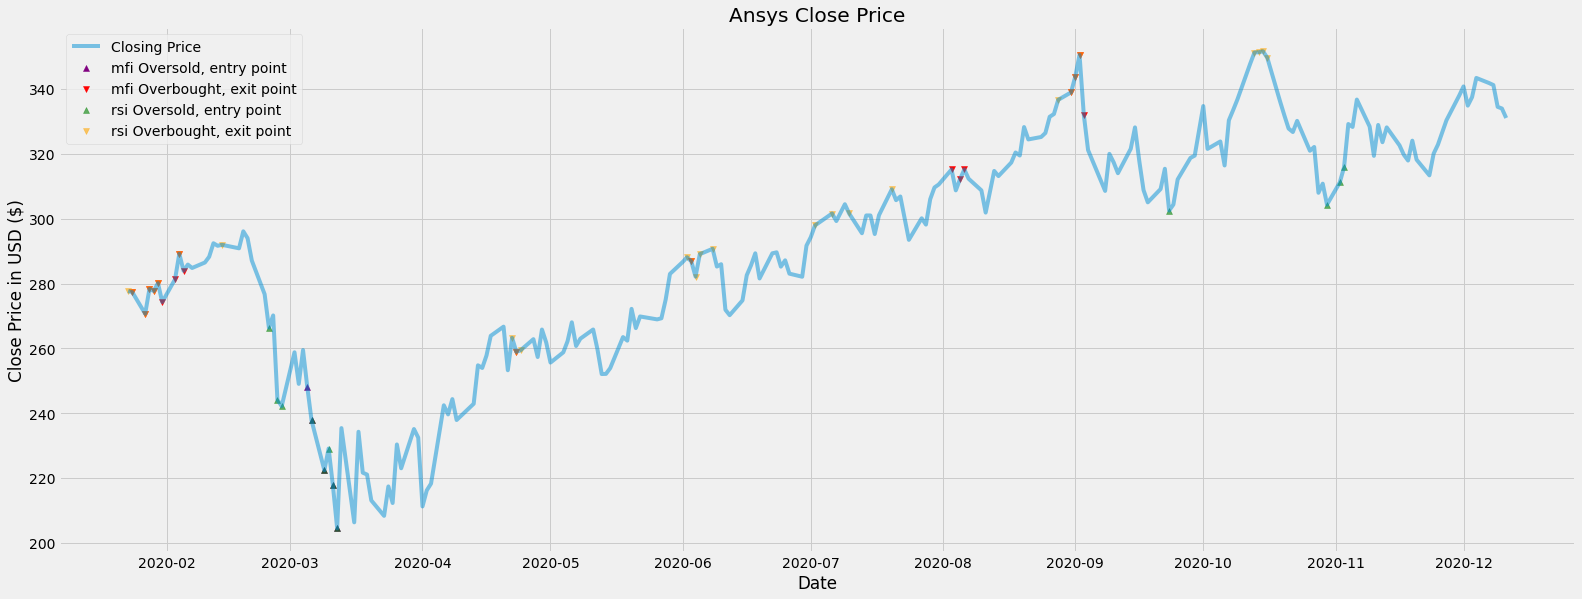

In [22]:
#draw a pretty picture to show the RSI overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', label = 'rsi Oversold, entry point', marker = '^', alpha = 0.6)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.6)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

#On-Balance Volume
[OBV](https://www.investopedia.com/terms/o/onbalancevolume.asp) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. 

$$OBV= OBV_{prev}\begin{equation}
+\left\{ 
  \begin{aligned}
    -volume,  & \text{if } close < close_{prev}\\
    0, & \text{if } close = close_{prev}\\
    volume, & \text{if } close> close_{prev}\\
  \end{aligned}
  \right.
\end{equation}
$$
where <br>
$ OBV = \text{Current on-balance volume level} $

$ OBV_{prev} = \text{Previous on-balance volume level} $

volume = Latest trading volume amount


In [23]:
# calculate cumulative volumes OBV, obv_direction sets the if clause in the above equation,
obv_direction = df['Close'].diff() #calculate the difference of daily closing price
obv_direction[obv_direction > 0] = 1
obv_direction[obv_direction < 0] = -1

# calculate OBV
OBV = [0]
for i in range(1, len(df.Close)):
    OBV.append(OBV[-1] + obv_direction[i] * df.Volume[i])


In [24]:
OBV_df  = df.copy()
# add OBV to dataframe
OBV_df['OBV'] = OBV
# calculate OBV EMA
OBV_df['OBV_EMA'] = OBV_df['OBV'].ewm(span=20).mean()
OBV_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,259.660004,256.250000,257.010010,259.589996,657900,259.589996,0.0,0.000000e+00
2020-01-03,258.109985,253.750000,254.960007,256.970001,468400,256.970001,-468400.0,-2.459100e+05
2020-01-06,255.869995,252.619995,255.460007,254.589996,612600,254.589996,-1081000.0,-5.525500e+05
2020-01-07,258.339996,253.500000,255.110001,256.670013,357100,256.670013,-723900.0,-6.020161e+05
2020-01-08,258.890015,255.910004,256.410004,257.730011,445900,257.730011,-278000.0,-5.236394e+05
...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,4024000.0,3.480250e+06
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,3621300.0,3.493683e+06
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,3291700.0,3.474446e+06


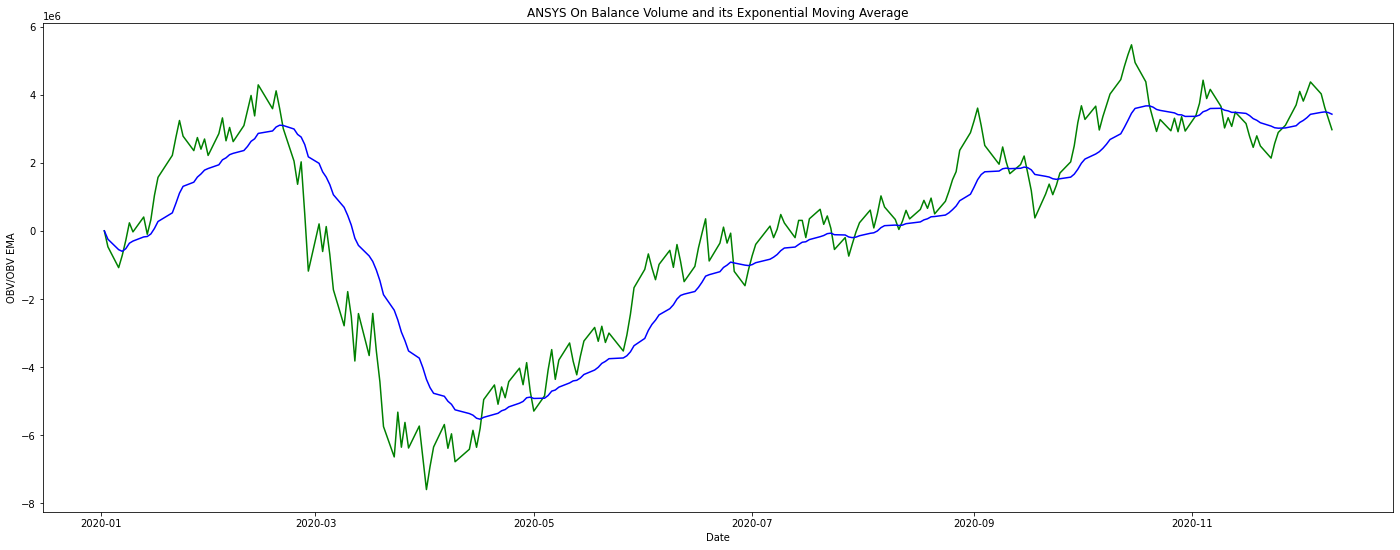

In [9]:
# plot OBV, OBV EMA
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['OBV'], label = 'OBV', color = 'green')
plt.plot(OBV_df['OBV_EMA'], label = 'OBV EMA', color = 'blue')
plt.title('ANSYS On Balance Volume and its Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('OBV/OBV EMA')
# plt.legend(df.columns.label, loc='upper left')
plt.show()

In [25]:
#cross over points in above chart are defined as entry exit points, OBV > OBV_EMA buy, else sell
def get_obv_points(FullDataFrame):
    buy_signal = []; sell_signal = []
    flag = -1

    for i in range(len(FullDataFrame)):
        if FullDataFrame['OBV'][i] < FullDataFrame['OBV_EMA'][i] and flag == 1:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
            flag = -1
        elif FullDataFrame['OBV'][i] > FullDataFrame['OBV_EMA'][i] and flag == -1:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
            flag = 1
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [26]:
x= get_obv_points(OBV_df)
OBV_df['OBV_Buy'] = x[0]
OBV_df['OBV_Sell'] = x[1]
OBV_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,OBV_Buy,OBV_Sell
Date,,,,,,,,,,
2020-01-02,259.660004,256.250000,257.010010,259.589996,657900,259.589996,0.0,0.000000e+00,NaN,NaN
2020-01-03,258.109985,253.750000,254.960007,256.970001,468400,256.970001,-468400.0,-2.459100e+05,NaN,NaN
2020-01-06,255.869995,252.619995,255.460007,254.589996,612600,254.589996,-1081000.0,-5.525500e+05,NaN,NaN
2020-01-07,258.339996,253.500000,255.110001,256.670013,357100,256.670013,-723900.0,-6.020161e+05,NaN,NaN
2020-01-08,258.890015,255.910004,256.410004,257.730011,445900,257.730011,-278000.0,-5.236394e+05,257.730011,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,4024000.0,3.480250e+06,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,3621300.0,3.493683e+06,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,3291700.0,3.474446e+06,NaN,334.549988


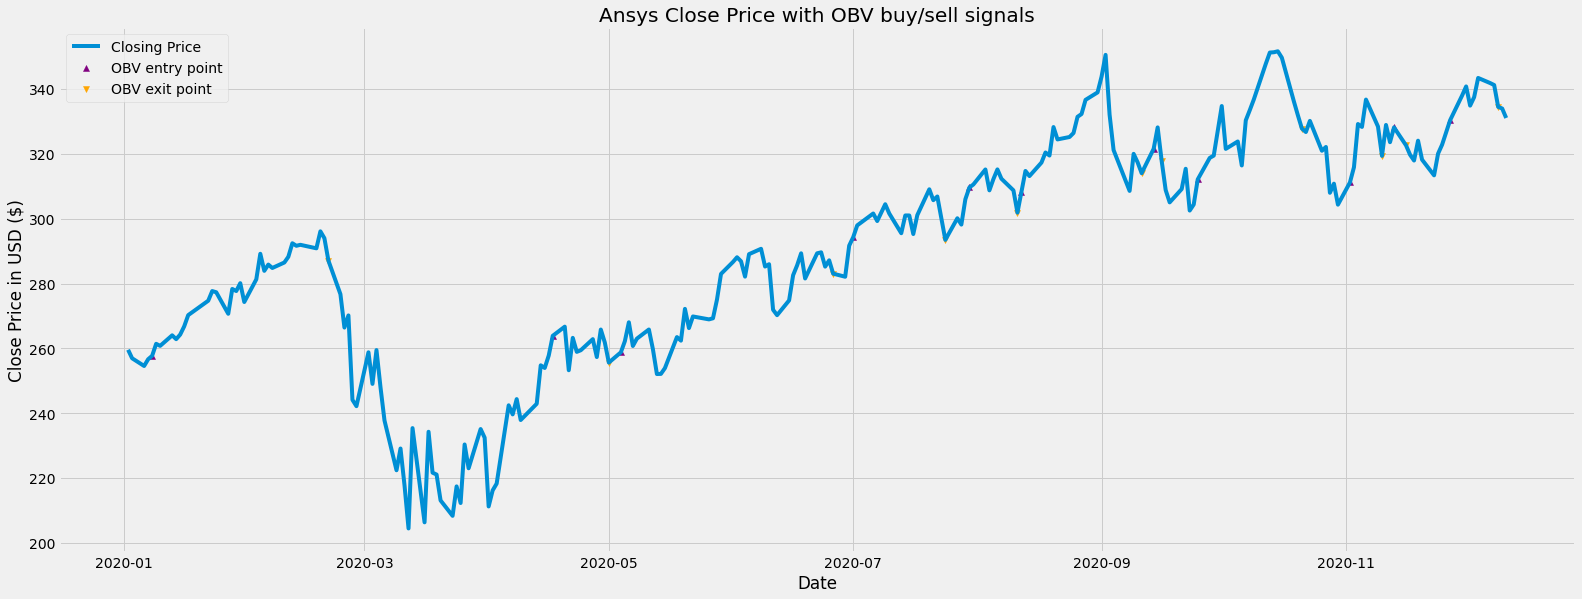

In [27]:
# Add OBV buy and sell points to OHLC chart
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['Close'], label = 'Closing Price')
plt.scatter(OBV_df.index, OBV_df['OBV_Buy'], color = 'purple', label = 'OBV entry point', marker = '^')
plt.scatter(OBV_df.index, OBV_df['OBV_Sell'], color = 'orange', label = 'OBV exit point', marker = 'v')
plt.title('Ansys Close Price with OBV buy/sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

In [28]:
full_df['OBV_Buy'] = x[0][period:]
full_df['OBV_Sell'] = x[1][period:]

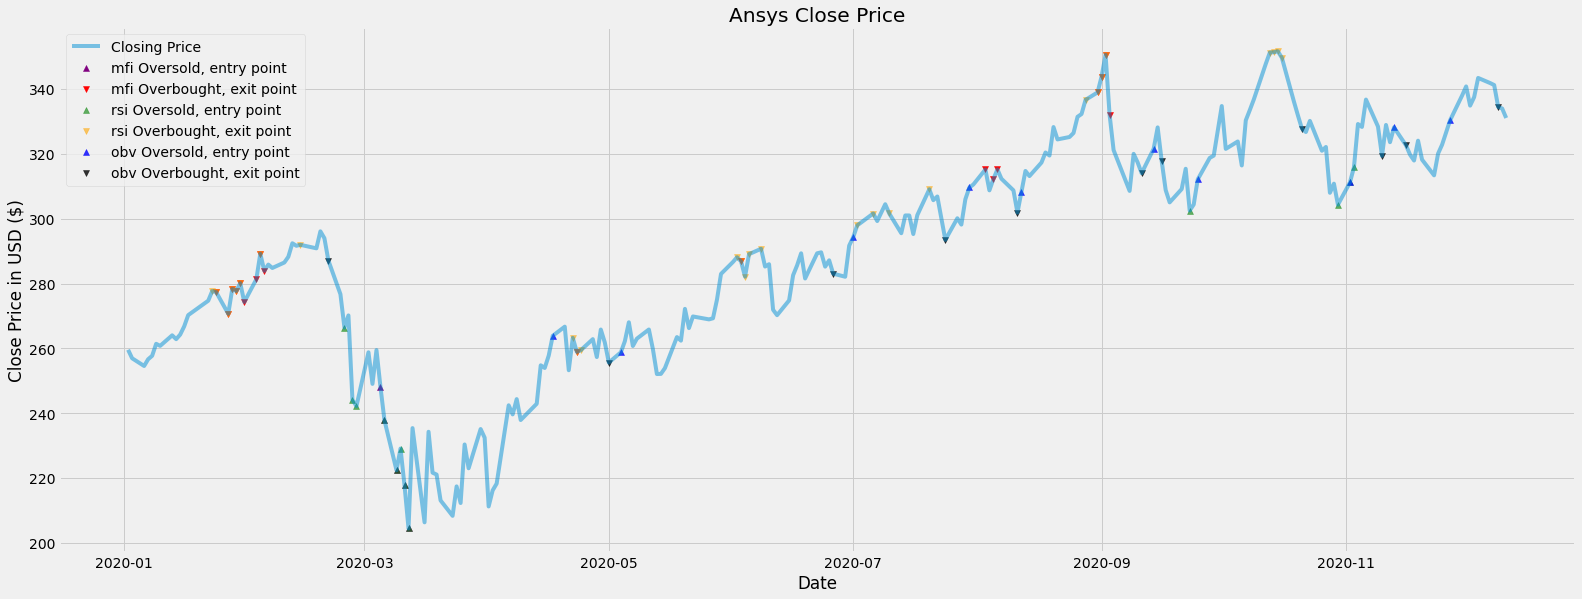

In [29]:
#add OBV to RSI, MFI chart
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', label = 'rsi Oversold, entry point', marker = '^', alpha = 0.6)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.6)
plt.scatter(full_df.index, full_df['OBV_Buy'], color = 'blue', label = 'obv Oversold, entry point', marker = '^', alpha = 0.8)
plt.scatter(full_df.index, full_df['OBV_Sell'], color = 'black', label = 'obv Overbought, exit point', marker = 'v', alpha = 0.8)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

<h1>Bollinger Band Strategy</h1>
<a class="anchor" id="BBS">BBS</a> is another technical analysis tool to find entry and exit price trending SMA's standard deviation of a security's price


$ MA = Moving \; Average \; where \; SMA \; usually \; use \; n=20$ <br>
$ typical \; price = \frac{High + Low + Close}{3} $ <br>
$ m = 2 \; number \; of \; standard \; deviation; \; m = 2σ  $


In [30]:
# Calculate SMA20, Standard Deviation σ
sma_period = 20
df['SMA'] = df['Close'].rolling(window=sma_period).mean()
df['2xSTD'] = df['Close'].rolling(window=sma_period).std() * 2
df['Tp_SMA'] = typical_price.rolling(window=sma_period).mean()
df['2xTPSTD'] = df['Close'].rolling(window=sma_period).std() * 2

Bollinger Bands Upper Bands <br>
$B_Upper = MA(TP,n) + m∗σ[TP,n] $<br><br>
Bollinger Bands Lower Bands, Simliarly  <br>
$B_Lower = MA(TP,n) - m∗σ[TP,n] $

In [31]:
# calculate upper band and lower band
# df['Upper'] = df['SMA'] + (df['STD'] * 2 )
# df['Lower'] = df['SMA'] - (df['STD'] * 2 )
df['Upper']= df['Tp_SMA'] + df['2xTPSTD'] 
df['Lower']= df['Tp_SMA'] - df['2xTPSTD'] 


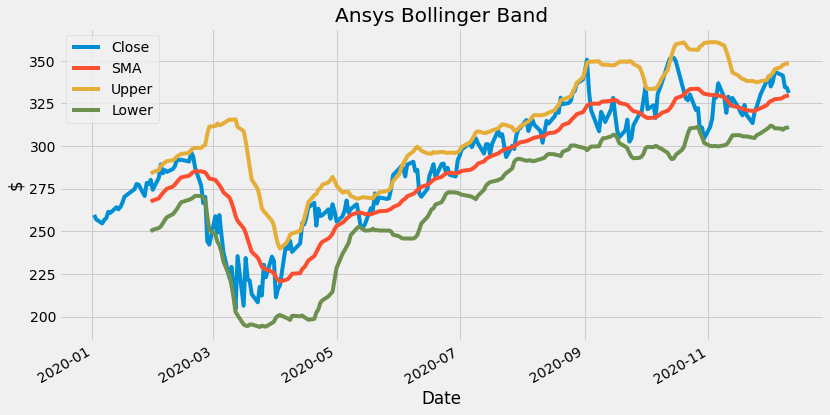

In [33]:
column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Ansys Bollinger Band')
plt.ylabel('$')
plt.show()

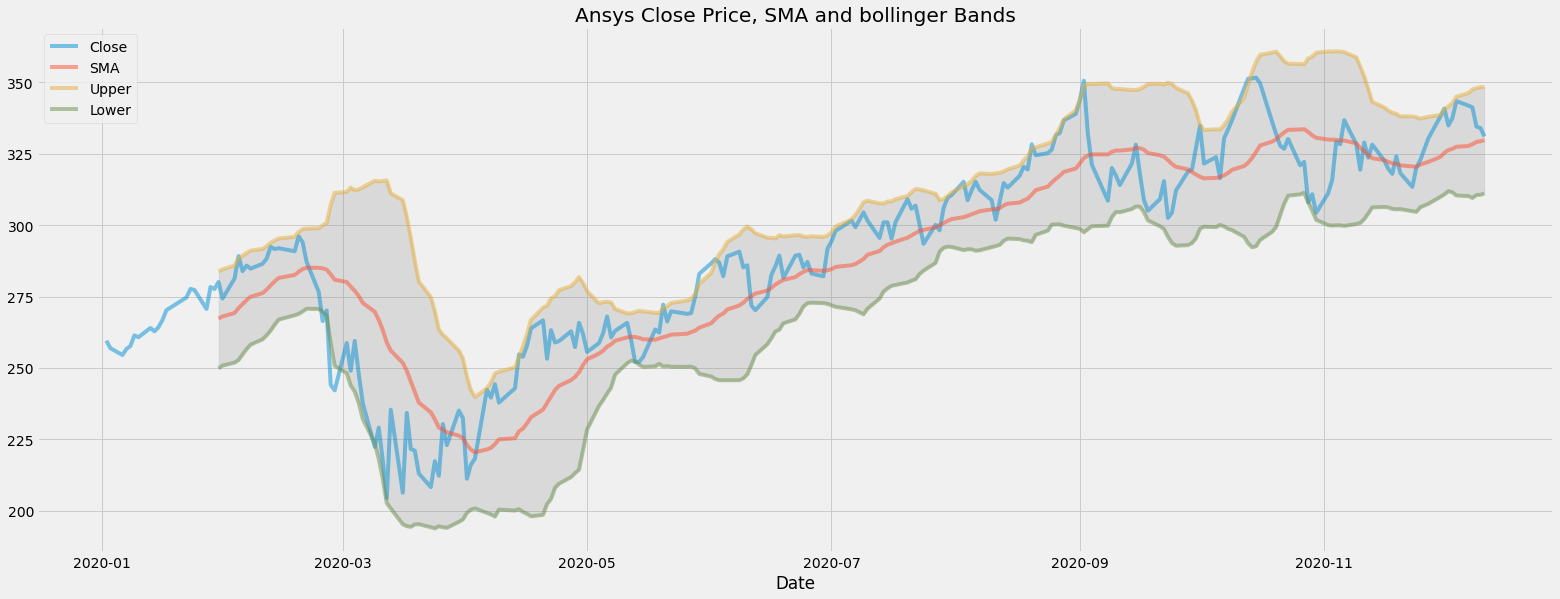

In [34]:
#shade the area
x_axis=df.index
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Ansys Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.legend(column_list, loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

In [35]:
def get_b_band_points(bband, period):
    bband_entry = []; bband_exit=[]

    for i in range(len(bband['Close'])):
        if bband['Close'][i] > bband['Upper'][i]: # close > upper band, sell
            bband_entry.append(np.nan)
            bband_exit.append(bband['Close'][i])
        elif bband['Close'][i] < bband['Lower'][i]: # close < lower band, buy
            bband_exit.append(np.nan)
            bband_entry.append(bband['Close'][i])
        else:
            bband_exit.append(np.nan)
            bband_entry.append(np.nan)
    return (bband_entry[period:], bband_exit[period:])


In [36]:
full_df['Bband_Buy'] = get_b_band_points(df, period)[0]
full_df['Bband_Sell'] = get_b_band_points(df, period)[1]

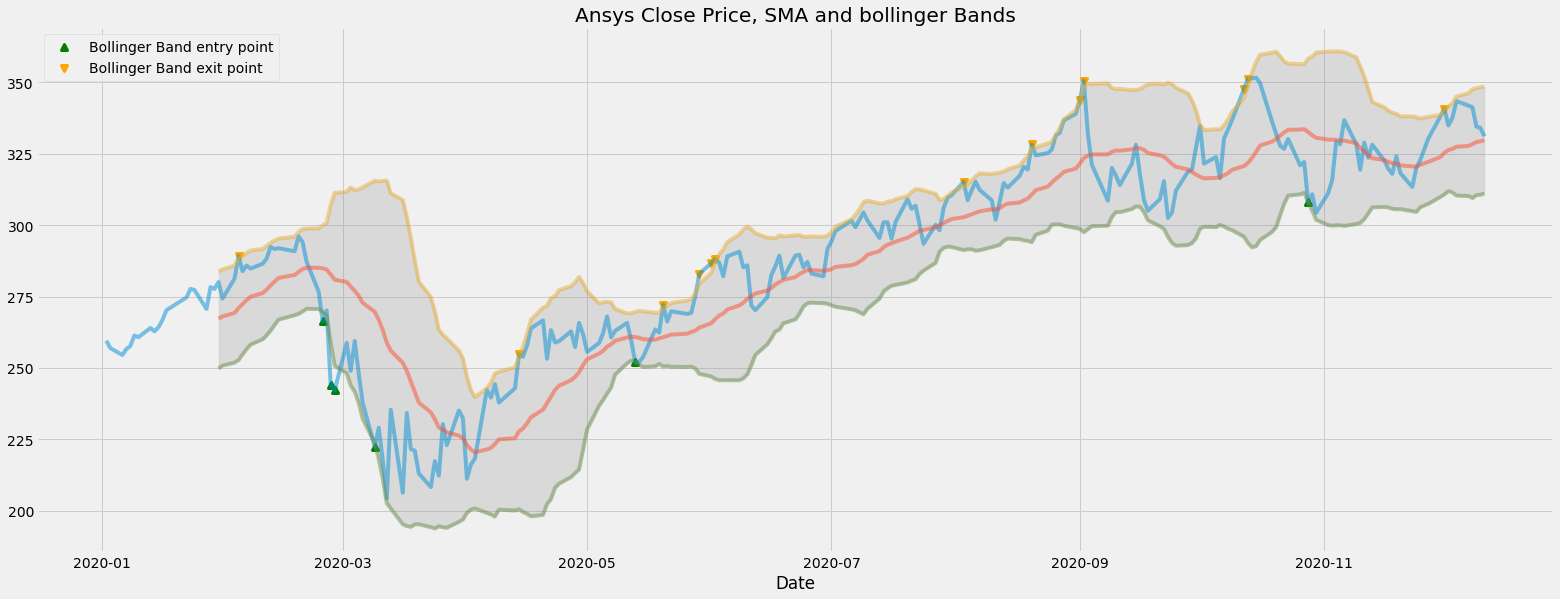

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Ansys Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'green', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'orange', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.legend(loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

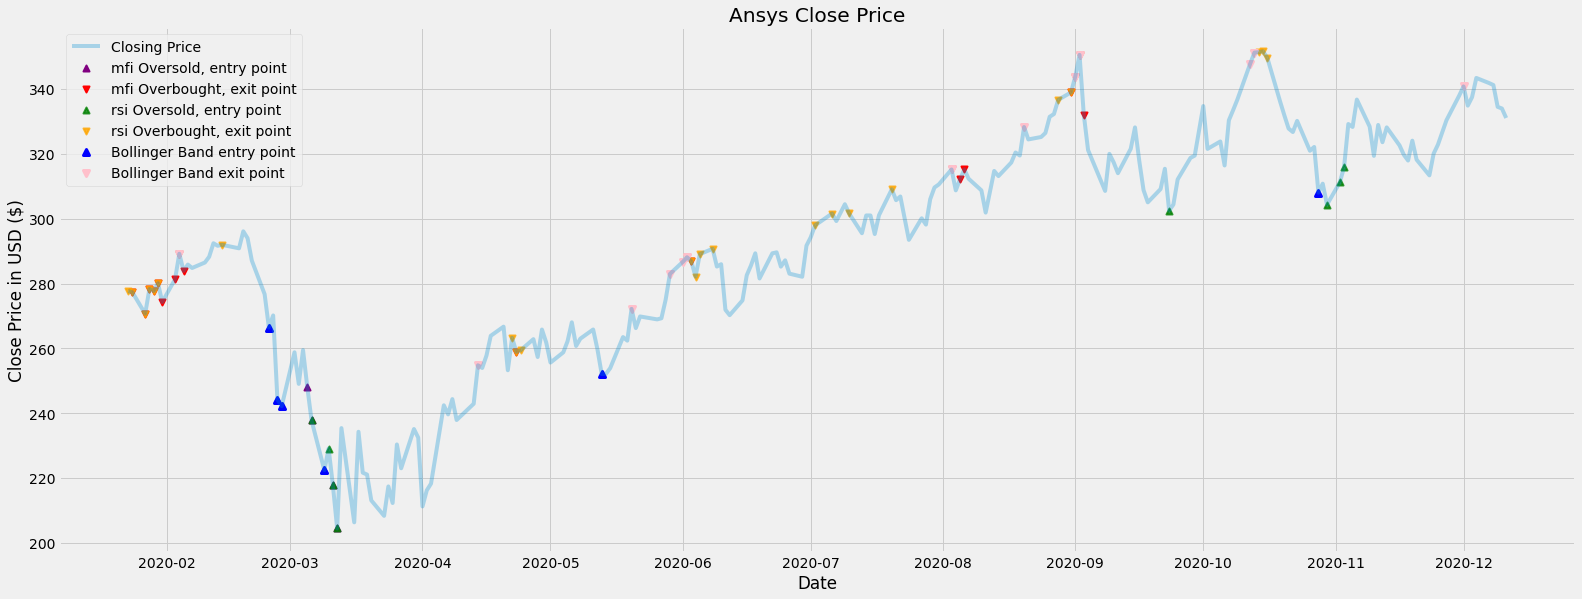

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.3)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', lw=2, label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', lw=2, label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', lw=2, label = 'rsi Oversold, entry point', marker = '^', alpha = 0.8)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', lw=2, label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.8)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'blue', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'pink', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()